In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


#Segunda fuente(Fuente oficial)

df_4 = pd.read_csv('../data/languages.csv')
fuente_4 = "https://github.com/github/innovationgraph/tree/main"


# ...

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [22]:
# Siguiente dataset... Languages
df_4.head(10)

,num_pushers,language,language_type,iso2_code,year,quarter
0,2066,HTML,markup,AE,2020,1
1,1627,CSS,markup,AE,2020,1
2,288,Jupyter Notebook,markup,AE,2020,1
3,108,Vue,markup,AE,2020,1
4,1734,JavaScript,programming,AE,2020,1
5,816,Python,programming,AE,2020,1
6,712,Shell,programming,AE,2020,1
7,685,Java,programming,AE,2020,1
8,377,Ruby,programming,AE,2020,1
9,373,Dockerfile,programming,AE,2020,1


In [23]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128129 entries, 0 to 128128
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   num_pushers    128129 non-null  int64 
 1   language       128129 non-null  object
 2   language_type  128129 non-null  object
 3   iso2_code      128083 non-null  object
 4   year           128129 non-null  int64 
 5   quarter        128129 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.9+ MB


In [24]:
# Miro cuantos tipos de language_type existen

df_4["language_type"].unique()

array(['markup', 'programming', 'data', 'prose'], dtype=object)

In [25]:
df_4

,num_pushers,language,language_type,iso2_code,year,quarter
0,2066,HTML,markup,AE,2020,1
1,1627,CSS,markup,AE,2020,1
2,288,Jupyter Notebook,markup,AE,2020,1
3,108,Vue,markup,AE,2020,1
4,1734,JavaScript,programming,AE,2020,1
...,...,...,...,...,...,...
128124,186,Java,programming,ZW,2024,3
128125,179,Nix,programming,ZW,2024,3
128126,177,PHP,programming,ZW,2024,3
128127,123,C,programming,ZW,2024,3


In [26]:
# Decido únicamente quedarme con language programing. Para ello lo filtro mediante una máscara

df_4_programming = df_4[df_4["language_type"]== "programming"]

In [27]:
df_4_programming.head()

,num_pushers,language,language_type,iso2_code,year,quarter
4,1734,JavaScript,programming,AE,2020,1
5,816,Python,programming,AE,2020,1
6,712,Shell,programming,AE,2020,1
7,685,Java,programming,AE,2020,1
8,377,Ruby,programming,AE,2020,1


In [28]:
df_4_programming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102586 entries, 4 to 128128
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   num_pushers    102586 non-null  int64 
 1   language       102586 non-null  object
 2   language_type  102586 non-null  object
 3   iso2_code      102570 non-null  object
 4   year           102586 non-null  int64 
 5   quarter        102586 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.5+ MB


In [29]:
# Agrupamos los valores por year y language y sumamos los num_pushers, así evitamos tenerlo por quarter. 
# groupby(['year', 'name']): Agrupa el dataframe por las columnas year y name.
# ['count'].sum(): Para cada grupo, suma los valores de la columna count.
# .reset_index(): Restablece el índice para que los grupos se conviertan en columnas nuevamente.



In [30]:
df_4_q_grouped =df_4_programming.groupby(['year', "quarter",'language'])['num_pushers'].sum().reset_index()
df_4_q_grouped

,year,quarter,language,num_pushers
0,2020,1,1C Enterprise,667
1,2020,1,AGS Script,640
2,2020,1,AMPL,1788
3,2020,1,ANTLR,7842
4,2020,1,ActionScript,2249
...,...,...,...,...
5202,2024,3,mcfunction,553
5203,2024,3,nesC,341
5204,2024,3,q,743
5205,2024,3,sed,21404


In [31]:
# Los ordenamos por year y num_pushers. 



In [32]:
df_4_q_grouped_sorted = df_4_q_grouped.sort_values(by=['year', "quarter",'num_pushers'], ascending=[True, True, False])
df_4_q_grouped_sorted

,year,quarter,language,num_pushers
94,2020,1,JavaScript,1674530
154,2020,1,Python,977900
181,2020,1,Shell,803568
93,2020,1,Java,720340
24,2020,1,C++,405616
...,...,...,...,...
5043,2024,3,Lasso,114
5076,2024,3,Nearley,113
4956,2024,3,ChucK,105
5150,2024,3,Smali,105


In [33]:
# Creo una columna con un indice para saber el orden del lenguaje de programación más utilizado por año


In [34]:
df_4_q_grouped_sorted['indice'] = df_4_q_grouped_sorted.groupby(['year',"quarter"]).cumcount() + 1
df_4_q_grouped_sorted

,year,quarter,language,num_pushers,indice
94,2020,1,JavaScript,1674530,1
154,2020,1,Python,977900,2
181,2020,1,Shell,803568,3
93,2020,1,Java,720340,4
24,2020,1,C++,405616,5
...,...,...,...,...,...
5043,2024,3,Lasso,114,291
5076,2024,3,Nearley,113,292
4956,2024,3,ChucK,105,293
5150,2024,3,Smali,105,294


In [35]:
# Limitamos el estudio a los 10 lenguajes más utilizados, para ello creamos una máscara con los indices menores o igual que 10
df_4_q_lenguaje10 = df_4_q_grouped_sorted[df_4_q_grouped_sorted["indice"] <= 15]
df_4_q_lenguaje10

,year,quarter,language,num_pushers,indice
94,2020,1,JavaScript,1674530,1
154,2020,1,Python,977900,2
181,2020,1,Shell,803568,3
93,2020,1,Java,720340,4
24,2020,1,C++,405616,5
...,...,...,...,...,...
4944,2024,3,C#,398623,11
5132,2024,3,Ruby,330110,12
4948,2024,3,CMake,322478,13
4937,2024,3,Batchfile,312833,14


In [36]:
df_4_q_lenguaje10["year_quarter"] = df_4_q_lenguaje10["year"].astype("str") +"-Q"+  df_4_q_lenguaje10 ["quarter"].astype("str")
df_4_q_lenguaje10

C:\Users\guill\AppData\Local\Temp\ipykernel_9648\510195182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_q_lenguaje10["year_quarter"] = df_4_q_lenguaje10["year"].astype("str") +"-Q"+  df_4_q_lenguaje10 ["quarter"].astype("str")


,year,quarter,language,num_pushers,indice,year_quarter
94,2020,1,JavaScript,1674530,1,2020-Q1
154,2020,1,Python,977900,2,2020-Q1
181,2020,1,Shell,803568,3,2020-Q1
93,2020,1,Java,720340,4,2020-Q1
24,2020,1,C++,405616,5,2020-Q1
...,...,...,...,...,...,...
4944,2024,3,C#,398623,11,2024-Q3
5132,2024,3,Ruby,330110,12,2024-Q3
4948,2024,3,CMake,322478,13,2024-Q3
4937,2024,3,Batchfile,312833,14,2024-Q3


C:\Users\guill\AppData\Local\Temp\ipykernel_9648\2610796605.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_values = df_4_q_lenguaje10.groupby('language').apply(


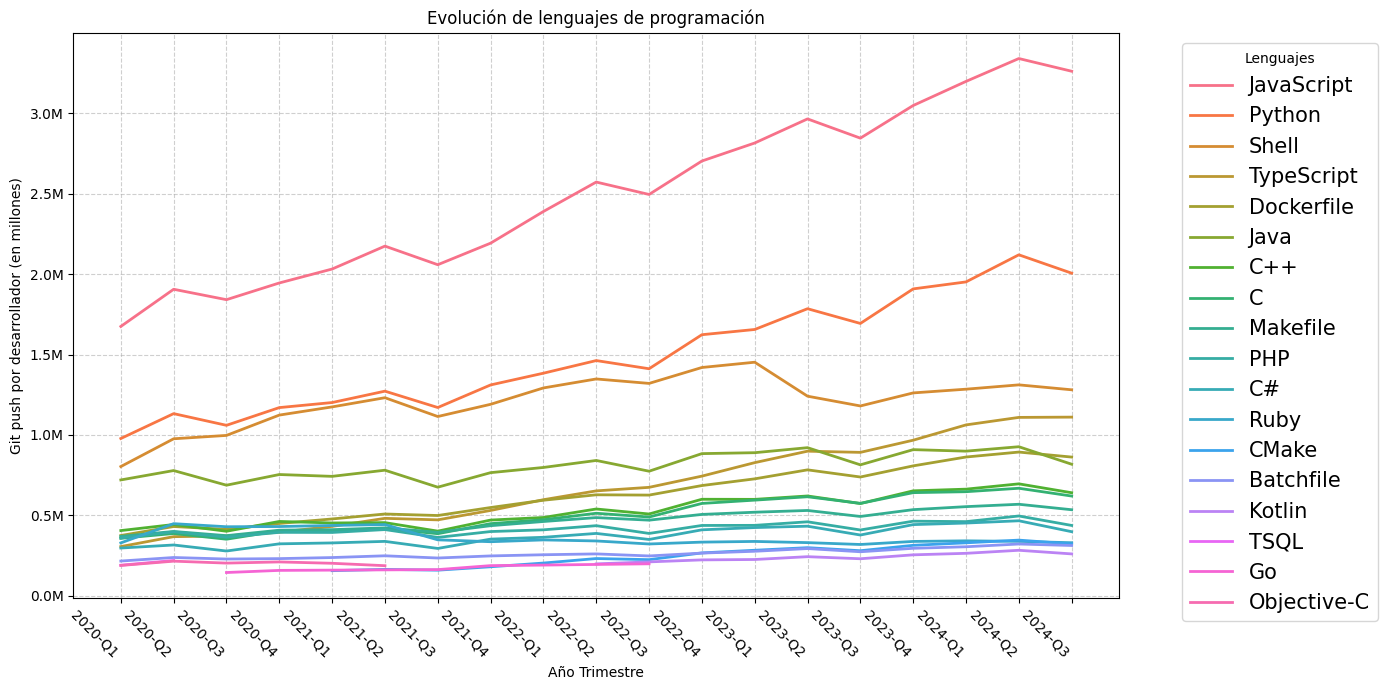

In [37]:
from matplotlib.ticker import FuncFormatter
# Step 1: Obtener el valor máximo de 'num_pushers' al final de la serie temporal para cada lenguaje
latest_values = df_4_q_lenguaje10.groupby('language').apply(
    lambda x: x.loc[x['year_quarter'].idxmax(), 'num_pushers']
).sort_values(ascending=False)

# Step 2: Obtener el orden de los lenguajes basado en el valor máximo de 'num_pushers'
ordered_languages = latest_values.index

# Create a custom formatter function to display values in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Divide by 1e6 to convert to millions and format to one decimal place

# Create the line plot
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_4_q_lenguaje10, x='year_quarter', y='num_pushers', hue='language', 
             linewidth=2, hue_order=ordered_languages)

# Customize labels and title
plt.xlabel('Año Trimestre')
plt.ylabel('Git push por desarrollador (en millones)')
plt.title('Evolución de lenguajes de programación')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=-45, ha='right')

# Apply the custom y-axis formatter to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Optional: Adjust the legend if needed
plt.legend(title='Lenguajes', loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 15})

# Show gridlines for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


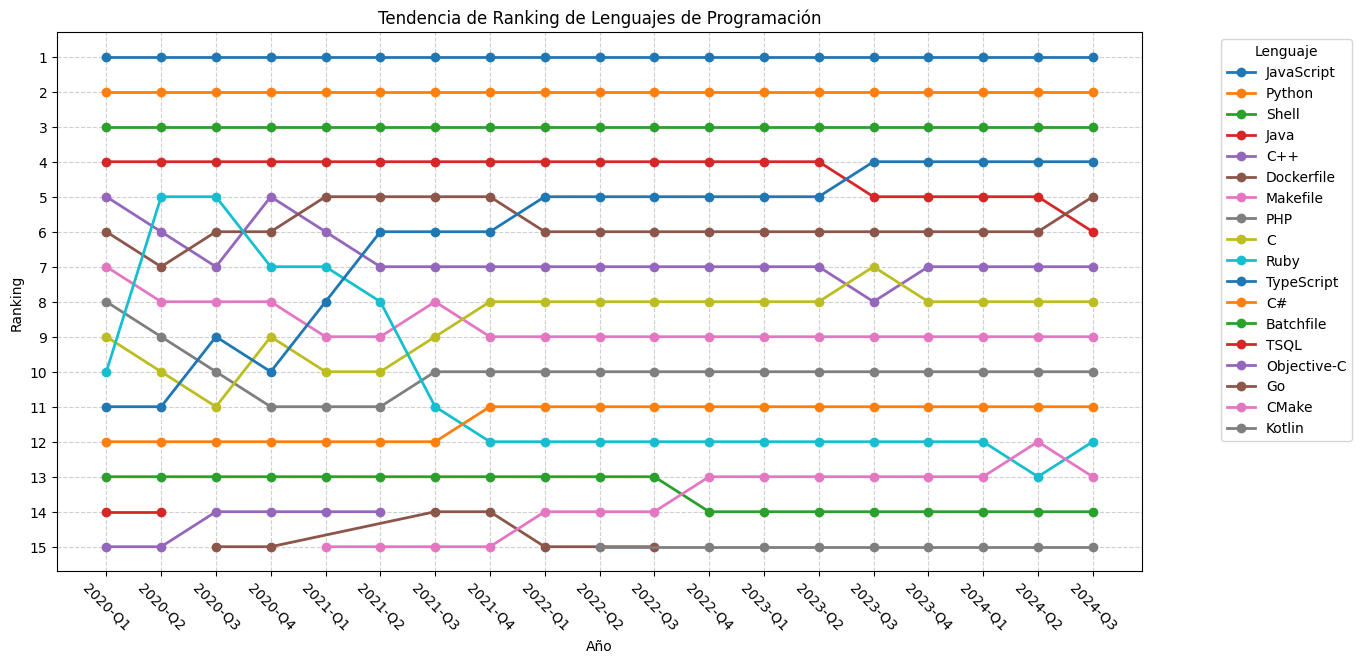

In [38]:
# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar cada lenguaje individualmente
for language in df_4_q_lenguaje10["language"].unique():
    subset = df_4_q_lenguaje10[df_4_q_lenguaje10["language"] == language]
    plt.plot(subset["year_quarter"], subset["indice"], marker="o", label=language, linewidth=2)

# Invertir el eje Y para que 1 sea el top ranking
plt.gca().invert_yaxis()

# Personalizar ejes y leyenda
plt.xlabel("Año")
plt.ylabel("Ranking")
plt.title("Tendencia de Ranking de Lenguajes de Programación")
plt.xticks(df_4_q_lenguaje10["year_quarter"].unique(),rotation=-45)  # Asegurar que todos los años están en el eje X
plt.yticks(range(1, 16))
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), title="Lenguaje")
plt.grid(True, linestyle="--", alpha=0.6)